In [1]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from MultivariatePoisson import MultivariatePoisson as mvp
from scipy.stats import norm, multivariate_normal
from CopulaGenerator import CopulaGenerator
%load_ext autoreload
%autoreload 2

In [4]:
multi_poisson = mvp(family="clayton", alpha=4.78)

In [16]:
data, mean = multi_poisson.rvs(size=(2,20))

In [18]:
pmf = multi_poisson.pmf(data, mean)

In [50]:
def draw_board(x, pmf):
    dim = x.shape[1]
    min_v = int(np.min(x))
    max_v = int(np.max(x))
    fresh_board = np.zeros((dim, dim))
    
    
    for i in range(min_v, max_v+1):
        for j in range(min_v, max_v+1):
            a = np.argwhere(x[0]==i)
            b = np.argwhere(x[1]==j)
            if np.in1d(a, b).any():
                index_pmf = [i for i in a if i in b][0]
                value_in_pmf = pmf[index_pmf]
                fresh_board[i][j] = value_in_pmf
                
    return fresh_board
                

In [52]:
c = draw_board(data, pmf)

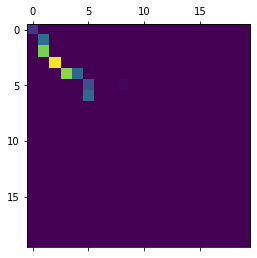

In [53]:
plt.matshow(c)